# Just to test some simple MDPs ideas

### (mainly transitions)

In [ ]:
import random
from collections import defaultdict
import numpy as np
from utils import vector_add, orientations, turn_right, turn_left

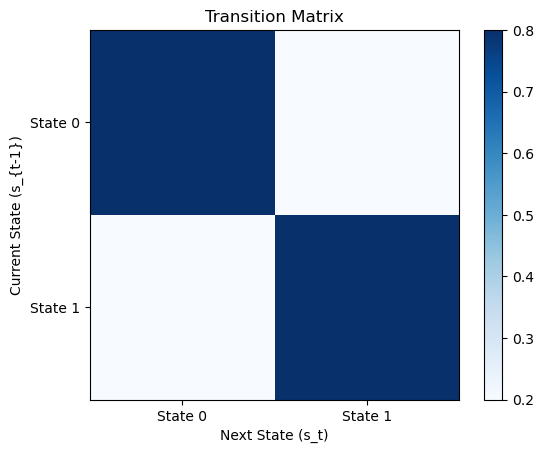

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def create_transition_matrix(p_stay):
    # Define the transition matrix
    transition_matrix = np.array([[p_stay, 1 - p_stay],
                                  [1 - p_stay, p_stay]])
    return transition_matrix

def plot_transition_matrix(transition_matrix):
    # Create a heatmap of the transition matrix with blue colormap
    plt.imshow(transition_matrix, cmap='Blues', interpolation='nearest')
    plt.colorbar()
    plt.xticks([0, 1], ['State 0', 'State 1'])
    plt.yticks([0, 1], ['State 0', 'State 1'])
    plt.xlabel('Next State (s_t)')
    plt.ylabel('Current State (s_{t-1})')
    plt.title('Transition Matrix')
    plt.show()

# Example usage
p_stay = 0.8  # Example probability value
transition_matrix = create_transition_matrix(p_stay)
plot_transition_matrix(transition_matrix)


In [48]:
def create_transitions(p_stay=-.8):
    create_transition_matrix(p_stay)

    actions = {
        'State 0': {'Action 0': [(transition_matrix[0][0], 'State 0'), (transition_matrix[0][1], 'State 1')]},
        'State 1': {'Action 1': [(transition_matrix[1][0], 'State 0'), (transition_matrix[1][1], 'State 1')]}
    }

    transitions = {
        'State 0': actions['State 0'],
        'State 1': actions['State 1']
    }

    return transitions

transitions = create_transitions(p_stay=0.8)
print(transitions)


{'State 0': {'Action 0': [(0.8, 'State 0'), (0.2, 'State 1')]}, 'State 1': {'Action 1': [(0.2, 'State 0'), (0.8, 'State 1')]}}


In [43]:
def get_states_from_transitions(transitions):
    if isinstance(transitions, dict):
        s1 = set(transitions.keys())
        s2 = set(tr[1] for actions in transitions.values()
                 for effects in actions.values()
                 for tr in effects)
        return s1.union(s2)
    else:
        print('Could not retrieve states from transitions')
        return None

transitions = create_transitions(p_stay=0.8)

t_prob = [[[0.65, 0.35], [0.65, 0.35]], [[0.65, 0.35], [0.65, 0.35]], [[1.0, 0.0], [0.0, 1.0]]]

states = get_states_from_transitions(transitions)
print(states)

{'State 1', 'State 0'}


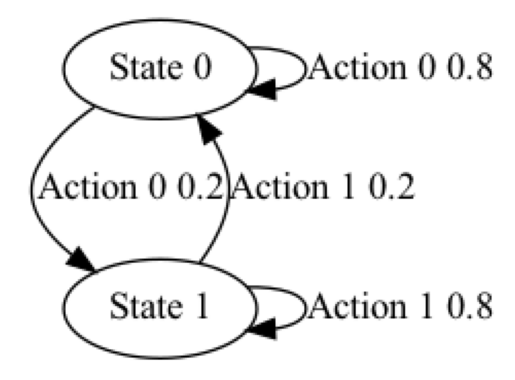

In [11]:
import pygraphviz as pgv
import matplotlib.pyplot as plt

def visualize_state_transitions(transitions):
    G = pgv.AGraph(directed=True)

    for state, actions in transitions.items():
        G.add_node(state)
        for action, effects in actions.items():
            for prob, next_state in effects:
                G.add_edge(state, next_state, label=f"{action} {prob}")

    G.layout(prog="dot")
    G.draw("state_transitions.png")
    plt.imshow(plt.imread("state_transitions.png"))
    plt.axis('off')
    plt.show()

# Transition matrix
transition_matrix = [[0.8, 0.2],
                     [0.2, 0.8]]

# Actions
actions = {
    'State 0': {'Action 0': [(transition_matrix[0][0], 'State 0'), (transition_matrix[0][1], 'State 1')]},
    'State 1': {'Action 1': [(transition_matrix[1][0], 'State 0'), (transition_matrix[1][1], 'State 1')]}
}

# Create transitions dictionary
transitions = {
    'State 0': actions['State 0'],
    'State 1': actions['State 1']
}

# Visualize the state transitions
visualize_state_transitions(transitions)


In [44]:
import random

def create_transitions(p_stay=-0.8):
    transition_matrix = create_transition_matrix(p_stay)

    actions = {
        'State 0': {'Action 0': [(transition_matrix[0][0], 'State 0'), (transition_matrix[0][1], 'State 1')]},
        'State 1': {'Action 1': [(transition_matrix[1][0], 'State 0'), (transition_matrix[1][1], 'State 1')]}
    }

    transitions = {
        'State 0': actions['State 0'],
        'State 1': actions['State 1']
    }

    return transitions

# def create_transition_matrix(p_stay):
#     transition_matrix = [[p_stay, 1 - p_stay],
#                          [1 - p_stay, p_stay]]
#     return transition_matrix

def simulate_agent(iterations=2):
    transitions = create_transitions(p_stay=0.8)
    states = ['State 0', 'State 1']
    agent_path = []
    
    start_state = random.choice(states)
    print(start_state)
    agent_path.append(start_state)
    current_state = start_state

    for _ in range(iterations):
        current_actions = transitions[current_state]
        available_actions = list(current_actions.keys())  # Get the available actions for the current state
        action = random.choice(available_actions)
        effects = current_actions[action]
        probabilities, next_states = zip(*effects)
        next_state = random.choices(next_states, weights=probabilities)[0]

        if next_state == current_state:
            agent_path.append(next_state)
            break

        agent_path.append(next_state)
        current_state = next_state

    return agent_path

# Perform simulation
path = simulate_agent(iterations=2)
print(path)


State 1
['State 1', 'State 1']


In [45]:
import random

def get_states_from_transitions(transitions):
    if isinstance(transitions, dict):
        s1 = set(transitions.keys())
        s2 = set(tr[1] for actions in transitions.values()
                 for effects in actions.values()
                 for tr in effects)
        return s1.union(s2)
    else:
        print('Could not retrieve states from transitions')
        return None

def create_transitions(p_stay=-0.8):
    transition_matrix = create_transition_matrix(p_stay)

    actions = {
        'State 0': {'Action 0': [(transition_matrix[0][0], 'State 0'), (transition_matrix[0][1], 'State 1')]},
        'State 1': {'Action 1': [(transition_matrix[1][0], 'State 0'), (transition_matrix[1][1], 'State 1')]}
    }

    transitions = {
        'State 0': actions['State 0'],
        'State 1': actions['State 1']
    }

    return transitions

def create_transition_matrix(p_stay):
    transition_matrix = [[p_stay, 1 - p_stay],
                         [1 - p_stay, p_stay]]
    return transition_matrix

def simulate_agent(iterations=2):
    transitions = create_transitions(p_stay=0.8)
    states = get_states_from_transitions(transitions)
    agent_path = []
    actions_taken = []
    
    start_state = random.choice(list(states))
    agent_path.append(start_state)
    current_state = start_state

    for _ in range(iterations):
        current_actions = transitions[current_state]
        available_actions = list(current_actions.keys())  # Get the available actions for the current state
        action = random.choice(available_actions)
        actions_taken.append(action)
        effects = current_actions[action]
        probabilities, next_states = zip(*effects)
        next_state = random.choices(next_states, weights=probabilities)[0]

        if next_state == current_state:
            agent_path.append(next_state)
            break

        agent_path.append(next_state)
        current_state = next_state

    return agent_path, actions_taken

# Perform simulation
path, actions = simulate_agent(iterations=2)
print("Agent Path:", path)
print("Actions Taken:", actions)


Agent Path: ['State 1', 'State 0', 'State 0']
Actions Taken: ['Action 1', 'Action 0']


In [47]:
import random

def get_states_from_transitions(transitions):
    if isinstance(transitions, dict):
        s1 = set(transitions.keys())
        s2 = set(tr[1] for actions in transitions.values()
                 for effects in actions.values()
                 for tr in effects)
        return s1.union(s2)
    else:
        print('Could not retrieve states from transitions')
        return None

def create_transitions(p_stay=-0.8):
    transition_matrix = create_transition_matrix(p_stay)

    actions = {
        'State 0': {'Action 0': [(transition_matrix[0][0], 'State 0'), (transition_matrix[0][1], 'State 1')]},
        'State 1': {'Action 1': [(transition_matrix[1][0], 'State 0'), (transition_matrix[1][1], 'State 1')]}
    }

    transitions = {
        'State 0': actions['State 0'],
        'State 1': actions['State 1']
    }

    return transitions

def create_transition_matrix(p_stay):
    transition_matrix = [[p_stay, 1 - p_stay],
                         [1 - p_stay, p_stay]]
    return transition_matrix

def simulate_agent(iterations=2):
    transitions = create_transitions(p_stay=0.8)
    states = get_states_from_transitions(transitions)
    agent_path = []
    actions_taken = []

    start_state = random.choice(list(states))
    agent_path.append(start_state)
    current_state = start_state

    for _ in range(iterations):
        current_actions = transitions[current_state]
        available_actions = list(current_actions.keys())  # Get the available actions for the current state
        action = random.choice(available_actions)
        actions_taken.append(action)
        effects = current_actions[action]
        probabilities, next_states = zip(*effects)
        next_state = random.choices(next_states, weights=probabilities)[0]

        # Make sure the next state matches the previous action
        if next_state == 'State 0':
            next_action = 'Action 0'
        elif next_state == 'State 1':
            next_action = 'Action 1'

        if action != next_action:
            agent_path.append(next_state)
            break

        agent_path.append(next_state)
        current_state = next_state

    return agent_path, actions_taken

# Perform simulation
path, actions = simulate_agent(iterations=2)
print("Agent Path:", path)
print("Actions Taken:", actions)


Agent Path: ['State 1', 'State 1', 'State 1']
Actions Taken: ['Action 1', 'Action 1']


In [14]:
class MDP:
    """A Markov Decision Process, defined by an initial state, transition model,
    and reward function. We also keep track of a gamma value, for use by
    algorithms. The transition model is represented somewhat differently from
    the text. Instead of P(s' | s, a) being a probability number for each
    state/state/action triplet, we instead have T(s, a) return a
    list of (p, s') pairs. We also keep track of the possible states,
    terminal states, and actions for each state. [Page 646]"""

    def __init__(self, init, terminals, transitions=None, reward=None, states=None):

        # collect states from transitions table if not passed.
        self.states = states or self.get_states_from_transitions(transitions)
        self.init = init

        # if isinstance(actlist, list):
        #     # if actlist is a list, all states have the same actions
        #     self.actlist = actlist

        # elif isinstance(actlist, dict):
        #     # if actlist is a dict, different actions for each state
        #     self.actlist = actlist

        # self.terminals = terminals
        # self.transitions = transitions or {}
        # if not self.transitions:
        #     print("Warning: Transition table is empty.")

        # self.gamma = gamma

        self.reward = reward or {s: 0 for s in self.states}

        # self.check_consistency()

    def R(self, state):
        """Return a numeric reward for this state."""

        return self.reward[state]

    def T(self, state, action):
        """Transition model. From a state and an action, return a list
        of (probability, result-state) pairs."""

        if not self.transitions:
            raise ValueError("Transition model is missing")
        else:
            return self.transitions[state][action]

    def actions(self, state):
        """Return a list of actions that can be performed in this state. By default, a
        fixed list of actions, except for terminal states. Override this
        method if you need to specialize by state."""

        if state in self.terminals:
            return [None]
        else:
            return self.actlist

    def get_states_from_transitions(self, transitions):
        if isinstance(transitions, dict):
            s1 = set(transitions.keys())
            s2 = set(tr[1] for actions in transitions.values()
                     for effects in actions.values()
                     for tr in effects)
            return s1.union(s2)
        else:
            print('Could not retrieve states from transitions')
            return None

    def check_consistency(self):

        # check that all states in transitions are valid
        assert set(self.states) == self.get_states_from_transitions(self.transitions)

        # check that init is a valid state
        assert self.init in self.states

        # check reward for each state
        assert set(self.reward.keys()) == set(self.states)

        # check that all terminals are valid states
        assert all(t in self.states for t in self.terminals)

        # check that probability distributions for all actions sum to 1
        for s1, actions in self.transitions.items():
            for a in actions.keys():
                s = 0
                for o in actions[a]:
                    s += o[0]
                assert abs(s - 1) < 0.001

In [ ]:
# transition function P(s'|s,a)
transitions = create_transitions(p_stay=0.8)


# evidence function P(e|s)
# e_prob = [[[0.5, 0.5], [0.5, 0.5]], [[0.5, 0.5], [0.5, 0.5]], [[0.8, 0.2], [0.3, 0.7]]]
# reward function
rewards = [[5, -10], [-20, 5], [-1, -1]]

gamma = 0.95
actions = ('0', '1', '2')
states = ('0', '1')

mdp = MDP(actions, transitions, rewards, states)

In [17]:
print([[5, -10], [-20, 5], [-1, -1]])

[[5, -10], [-20, 5], [-1, -1]]


In [ ]:
import random
import matplotlib.pyplot as plt

class MDP:
    def __init__(self, p_stay=0.8):
        self.states = ['State 0', 'State 1']
        self.actions = ['Action 0', 'Action 1']
        self.transition_matrix = [[p_stay, 1 - p_stay],
                                  [1 - p_stay, p_stay]]

    def get_next_state(self, current_state, action):
        current_state_index = self.states.index(current_state)
        action_index = self.actions.index(action)
        probabilities = self.transition_matrix[current_state_index]
        next_state_index = random.choices(range(len(self.states)), probabilities)[0]
        return self.states[next_state_index]

    def run_mdp(self, num_iterations):
        x_state_0 = [0]
        y_state_0 = [0]

        x_state_1 = [0]
        y_state_1 = [1]

        for i in range(1, num_iterations):
            action = random.choice(self.actions)
            current_state = self.get_next_state(self.states[y_state_0[-1]], action)

            if current_state == 'State 0':
                x_state_0.append(i)
                y_state_0.append(0)
            else:
                x_state_1.append(i)
                y_state_1.append(1)

        return x_state_0, y_state_0, x_state_1, y_state_1

# Example usage
mdp = MDP()
num_iterations = 25
x_state_0, y_state_0, x_state_1, y_state_1 = mdp.run_mdp(num_iterations)

# Plot the state transitions as dots with different colors
plt.scatter(x_state_0, y_state_0, c='red', label='State 0')
plt.scatter(x_state_1, y_state_1, c='blue', label='State 1')

plt.xlabel("Iteration")
plt.ylabel("State")
plt.xticks(range(num_iterations + 1))
plt.yticks([0, 1], ['State 0', 'State 1'])
plt.title("MDP State Transitions")
plt.legend()
plt.show()
